In [1]:
import numpy as np
import matplotlib.pyplot as plt


def _cdf_with_replacement(i, n, N):
    return (i / N) ** n


def _compute_variance(N, cur_data, expected_max_cond_n, pdfs):
    """
    Вычисляет стандартное отклонение максимума.
    """
    variance_of_max_cond_n = []
    for n in range(N):
        cur_var = 0
        for i in range(N):
            cur_var += (cur_data[i] - expected_max_cond_n[n]) ** 2 * pdfs[n][i]
        cur_var = np.sqrt(cur_var)
        variance_of_max_cond_n.append(cur_var)
    return variance_of_max_cond_n


def samplemax(validation_performance):
    validation_performance = list(validation_performance)
    validation_performance.sort()
    N = len(validation_performance)
    pdfs = []
    for n in range(1, N + 1):
        F_Y_of_y = []
        for i in range(1, N + 1):
            F_Y_of_y.append(_cdf_with_replacement(i, n, N))

        f_Y_of_y = []
        cur_cdf_val = 0
        for i in range(len(F_Y_of_y)):
            f_Y_of_y.append(F_Y_of_y[i] - cur_cdf_val)
            cur_cdf_val = F_Y_of_y[i]

        pdfs.append(f_Y_of_y)

    expected_max_cond_n = []
    for n in range(N):
        cur_expected = 0
        for i in range(N):
            cur_expected += validation_performance[i] * pdfs[n][i]
        expected_max_cond_n.append(cur_expected)

    var_of_max_cond_n = _compute_variance(N, validation_performance, expected_max_cond_n, pdfs)

    return {
        "mean": expected_max_cond_n,
        "var": var_of_max_cond_n,
        "max": np.max(validation_performance),
        "min": np.min(validation_performance),
    }

# method_lc_dict = {}

# for method in leaderboard_df['method'].unique():
#     method_lc_dict[method] = leaderboard_df[leaderboard_df['method'] == method]['length_controlled_winrate'].values

# methods_results = {}
# for method, performance in method_lc_dict.items():
#     performance = sorted(np.array(performance))
#     result = samplemax(performance)
#     methods_results[method] = result

# markers = ['o', 's', 'D', '^', 'v']
# plt.figure(figsize=(10, 6))

# for idx, (method, result) in enumerate(methods_results.items()):
#     n_values = range(1, len(result["mean"]) + 1)
#     mean_values = result["mean"]
#     std_dev = result["var"]

#     plt.plot(
#         n_values,
#         mean_values,
#         label=method,
#         linewidth=2,
#         marker=markers[idx % len(markers)],  # Переключение маркера на каждый метод
#         markersize=6,
#     )

#     plt.fill_between(
#         n_values,
#         np.array(mean_values) - np.array(std_dev),
#         np.array(mean_values) + np.array(std_dev),
#         alpha=0.3,
#     )

# plt.xlabel("Coefficient assignments")
# plt.ylabel("Expected Validation LC win rate")
# # plt.xlim((1, 16))
# # plt.ylim((0, 10))
# plt.xticks(ticks=np.arange(1, 17, 1))
# # plt.title("Ожидаемый максимум с закрашенной зоной стандартного отклонения")
# plt.legend()
# plt.grid(True)
# plt.savefig('llama3b-evp.pdf')
# plt.show()

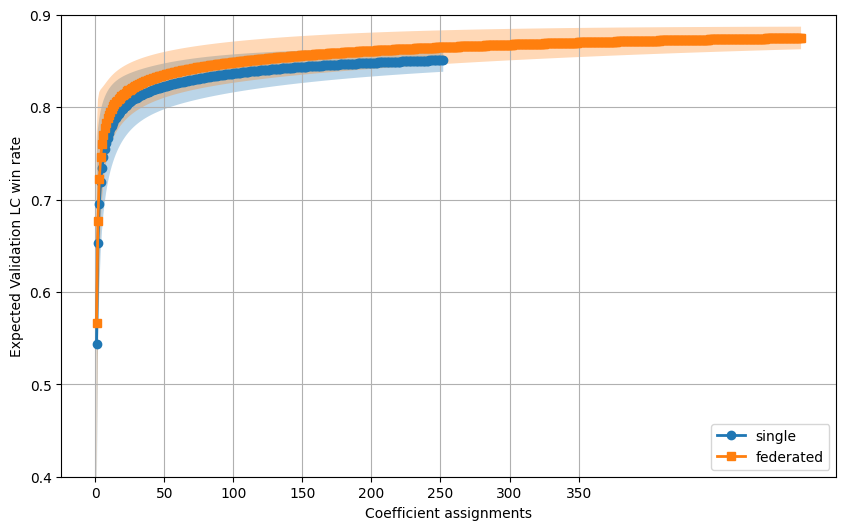

In [3]:
import pandas as pd

markers = ['o', 's', 'D', '^', 'v']

def get_statistics(values):
    performance = sorted(np.array(values))
    result = samplemax(performance)
    return result

def draw_plot(result: dict, label: str):
    n_values = range(1, len(result["mean"]) + 1)
    mean_values = result["mean"]
    std_dev = result["var"]

    plt.plot(
        n_values,
        mean_values,
        label=label,
        linewidth=2,
        marker="o" if label == "single" else "s",  # Переключение маркера на каждый метод
        markersize=6,
    )

    plt.fill_between(
        n_values,
        np.array(mean_values) - np.array(std_dev),
        np.array(mean_values) + np.array(std_dev),
        alpha=0.3,
    )

df = pd.read_csv("resources/wandb_export_tldr.csv")
single_values = df[df["reference.protocol.weightage.self_preference"] == 1]["winrate"].values
fed_values = df[df["reference.protocol.weightage.self_preference"] != 1]["winrate"].values

single_res = get_statistics(single_values)
fed_res = get_statistics(fed_values)

plt.figure(figsize=(10, 6))
draw_plot(single_res, "single")
draw_plot(fed_res, "federated")

plt.xlabel("Coefficient assignments")
plt.ylabel("Expected Validation LC win rate")
# plt.xlim((1, 16))
plt.ylim((0.4, 0.9))
plt.xticks(ticks=np.arange(0, 400, 50))
# plt.title("Ожидаемый максимум с закрашенной зоной стандартного отклонения")
plt.legend()
plt.grid(True)
# plt.savefig('llama3b-evp.pdf')
plt.show()

## Homogenous TL;DR

['#d6594c', '#cc9564', '#aab083', '#7d8995', '#4d7787', '#e9BD27', '#e88c1f']
0.7342779683027794
0.7820175251589523
0.7582306748010563


/tmp/ipykernel_122142/306851005.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  method_lc_dict[sp] = df[df['reference.protocol.weightage.self_preference'] == sp][~df['advantage.reward.kl_coeff'].isin([0.1, 0.3, 1.0])].groupby(["advantage.reward.kl_coeff", "reference.protocol.weightage.self_preference", "reference.update_every_n_steps"])['winrate'].mean().values
/tmp/ipykernel_122142/306851005.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  method_lc_dict[sp] = df[df['reference.protocol.weightage.self_preference'] == sp][~df['advantage.reward.kl_coeff'].isin([0.1, 0.3, 1.0])].groupby(["advantage.reward.kl_coeff", "reference.protocol.weightage.self_preference", "reference.update_every_n_steps"])['winrate'].mean().values
/tmp/ipykernel_122142/306851005.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  method_lc_dict[sp] = df[df['reference.protocol.weightage.self_preference'] == sp]

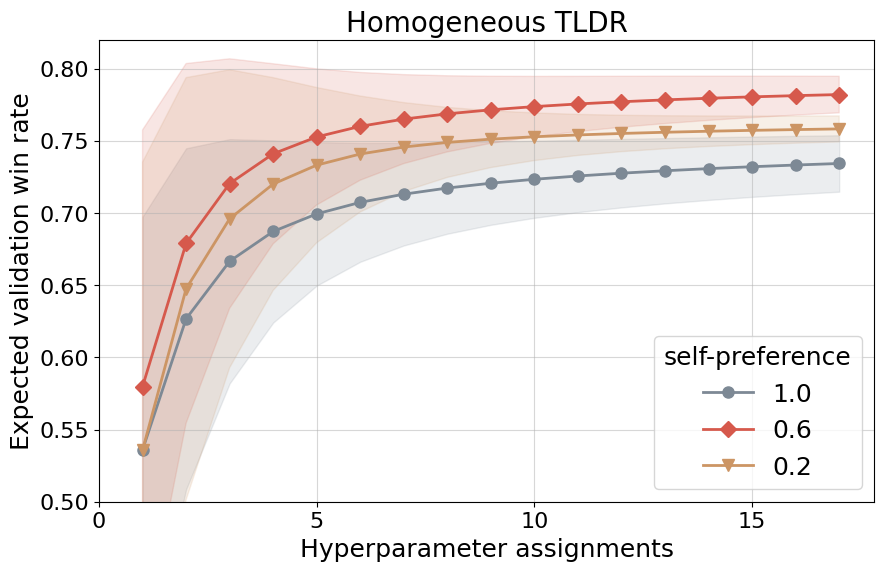

In [43]:
import pandas as pd

markers = ['o', 's', 'D', '^', 'v']
palette = ["#d6594c", "#cc9564", "#aab083", "#7d8995", "#4d7787", "#e9BD27", "#e88c1f"]
colors = ["#7d8995", "#e88c1f", "#d6594c", "#aab083", "#cc9564"]

print(palette)

def get_statistics(values):
    performance = sorted(np.array(values))
    result = samplemax(performance)
    return result

df = pd.read_csv("resources/wandb_export_tldr.csv")

method_lc_dict = {}

for sp in df['reference.protocol.weightage.self_preference'].unique():
    method_lc_dict[sp] = df[df['reference.protocol.weightage.self_preference'] == sp][~df['advantage.reward.kl_coeff'].isin([0.1, 0.3, 1.0])].groupby(["advantage.reward.kl_coeff", "reference.protocol.weightage.self_preference", "reference.update_every_n_steps"])['winrate'].mean().values

methods_results = {}
for method, performance in method_lc_dict.items():
    performance = sorted(np.array(performance))
    result = samplemax(performance)
    methods_results[method] = result

plt.figure(figsize=(10,6))

methods_results = dict(sorted(methods_results.items(), reverse=True))

methods_to_keep = [1.0, 0.6, 0.2]
for idx, (method, result) in enumerate(methods_results.items()):
    if method not in methods_to_keep:
        continue

    n_values = range(1, len(result["mean"]) + 1)
    mean_values = result["mean"]
    std_dev = result["var"]

    if method != 0.2:
        n_values = n_values[:-1]
        mean_values = mean_values[:-1]
        std_dev = std_dev[:-1]

    print(mean_values[-1])

    plt.plot(
        n_values,
        mean_values,
        label=method,
        linewidth=2,
        marker=markers[idx % len(markers)],  # Переключение маркера на каждый метод
        markersize=8,
        color=colors[idx]
    )

    plt.fill_between(
        n_values,
        np.array(mean_values) - np.array(std_dev),
        np.array(mean_values) + np.array(std_dev),
        alpha=0.15,
        color=colors[idx]
    )

plt.xlabel("Hyperparameter assignments", fontsize=18)
plt.ylabel("Expected validation win rate", fontsize=18)
# plt.xlim((1, 16))
plt.ylim((0.5, 0.82))
plt.xticks(ticks=np.arange(0, 20, 5), fontsize=16)
plt.yticks(fontsize=16)
# plt.title("Ожидаемый максимум с закрашенной зоной стандартного отклонения")
legend = plt.legend(title="self-preference", fontsize=18)
legend.get_title().set_fontsize('18')
plt.grid(True, alpha=0.5)
plt.title("Homogeneous TLDR", fontsize=20)
plt.savefig('tldr.pdf')
plt.show()

## Heterogeneous TL;DR

['#d6594c', '#cc9564', '#aab083', '#7d8995', '#4d7787', '#e9BD27', '#e88c1f']
0.7162446215817728
0.7558955406516652
0.7598244135756257


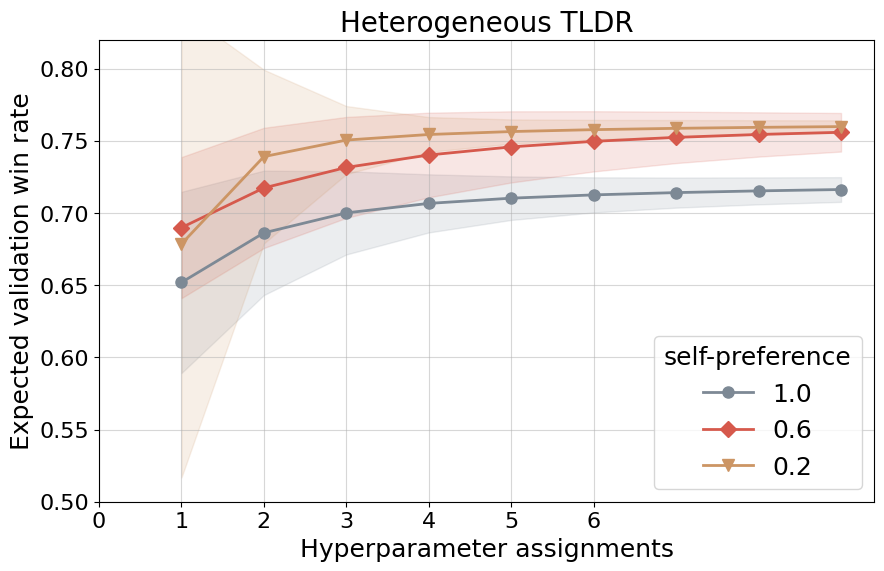

In [44]:
import pandas as pd

markers = ['o', 's', 'D', '^', 'v']
palette = ["#d6594c", "#cc9564", "#aab083", "#7d8995", "#4d7787", "#e9BD27", "#e88c1f"]
colors = ["#7d8995", "#e88c1f", "#d6594c", "#aab083", "#cc9564", "#e9BD27"]

print(palette)

def get_statistics(values):
    performance = sorted(np.array(values))
    result = samplemax(performance)
    return result

df = pd.read_csv("resources/wandb_export_ptldr.csv")

method_lc_dict = {}

for sp in df['reference.protocol.weightage.self_preference'].unique():
    method_lc_dict[sp] = df[df['reference.protocol.weightage.self_preference'] == sp].groupby(["advantage.reward.kl_coeff", "reference.protocol.weightage.self_preference", "reference.update_every_n_steps"])['winrate'].mean().values

methods_results = {}
for method, performance in method_lc_dict.items():
    performance = sorted(np.array(performance))
    result = samplemax(performance)
    methods_results[method] = result

plt.figure(figsize=(10,6))

methods_results = dict(sorted(methods_results.items(), reverse=True))

methods_to_keep = [1.0, 0.6, 0.2]
for idx, (method, result) in enumerate(methods_results.items()):
    if method not in methods_to_keep:
        continue

    n_values = range(1, len(result["mean"]) + 1)
    mean_values = result["mean"]
    std_dev = result["var"]

    print(mean_values[-1])

    plt.plot(
        n_values,
        mean_values,
        label=method,
        linewidth=2,
        marker=markers[idx % len(markers)],  # Переключение маркера на каждый метод
        markersize=8,
        color=colors[idx]
    )

    plt.fill_between(
        n_values,
        np.array(mean_values) - np.array(std_dev),
        np.array(mean_values) + np.array(std_dev),
        alpha=0.15,
        color=colors[idx]
    )

plt.xlabel("Hyperparameter assignments", fontsize=18)
plt.ylabel("Expected validation win rate", fontsize=18)
# plt.xlim((1, 16))
plt.ylim((0.5, 0.82))
plt.xticks(ticks=np.arange(0, 7, 1), fontsize=16)
plt.yticks(fontsize=16)
# plt.title("Ожидаемый максимум с закрашенной зоной стандартного отклонения")
legend = plt.legend(title="self-preference", fontsize=18)
legend.get_title().set_fontsize('18')
plt.grid(True, alpha=0.5)
plt.title("Heterogeneous TLDR", fontsize=20)
plt.savefig('ptldr.pdf')
plt.show()

## Heterogeneous TL;DR GRPO

['#d6594c', '#cc9564', '#aab083', '#7d8995', '#4d7787', '#e9BD27', '#e88c1f']
0.572337483578884
0.5870674281485554
0.6284183632763372


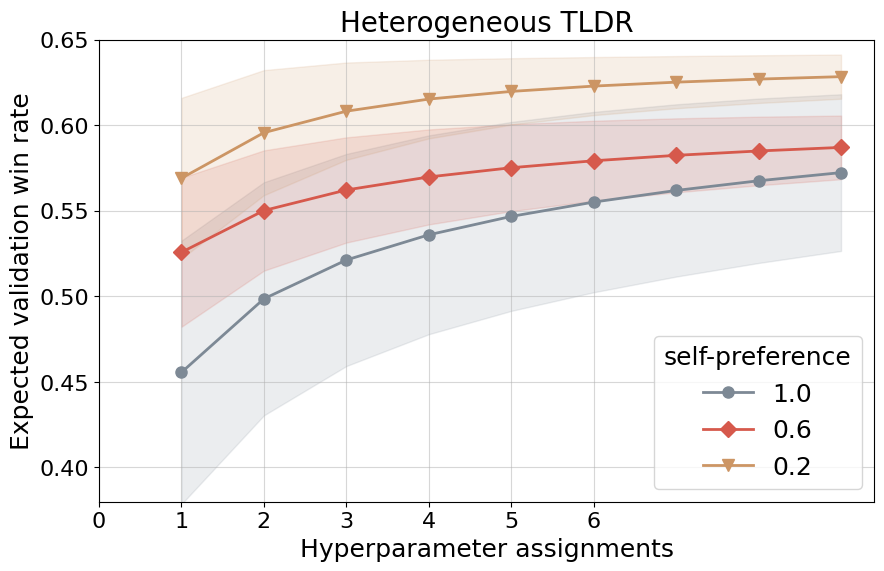

In [45]:
import pandas as pd

markers = ['o', 'D', 'v']
palette = ["#d6594c", "#cc9564", "#aab083", "#7d8995", "#4d7787", "#e9BD27", "#e88c1f"]
colors = ["#7d8995", "#d6594c", "#cc9564", "#e9BD27"]

print(palette)

def get_statistics(values):
    performance = sorted(np.array(values))
    result = samplemax(performance)
    return result

df = pd.read_csv("resources/wandb_export_ptldr_grpo.csv")

method_lc_dict = {}

for sp in df['reference.protocol.weightage.self_preference'].unique():
    method_lc_dict[sp] = df[df['reference.protocol.weightage.self_preference'] == sp].groupby(["kl_penalty.coeff", "reference.protocol.weightage.self_preference", "reference.update_every_n_steps"])['winrate'].mean().values

methods_results = {}
for method, performance in method_lc_dict.items():
    performance = sorted(np.array(performance))
    result = samplemax(performance)
    methods_results[method] = result

plt.figure(figsize=(10,6))

methods_results = dict(sorted(methods_results.items(), reverse=True))

for idx, (method, result) in enumerate(methods_results.items()):
    if method not in methods_to_keep:
        continue

    n_values = range(1, len(result["mean"]) + 1)
    mean_values = result["mean"]
    std_dev = result["var"]
    print(mean_values[-1])

    plt.plot(
        n_values,
        mean_values,
        label=method,
        linewidth=2,
        marker=markers[idx % len(markers)],  # Переключение маркера на каждый метод
        markersize=8,
        color=colors[idx]
    )

    plt.fill_between(
        n_values,
        np.array(mean_values) - np.array(std_dev),
        np.array(mean_values) + np.array(std_dev),
        alpha=0.15,
        color=colors[idx]
    )

plt.xlabel("Hyperparameter assignments", fontsize=18)
plt.ylabel("Expected validation win rate", fontsize=18)
# plt.xlim((1, 16))
plt.ylim((0.38, 0.65))
plt.xticks(ticks=np.arange(0, 7, 1), fontsize=16)
plt.yticks(fontsize=16)
# plt.title("Ожидаемый максимум с закрашенной зоной стандартного отклонения")
legend = plt.legend(title="self-preference", fontsize=18)
legend.get_title().set_fontsize('18')
plt.grid(True, alpha=0.5)
plt.title("Heterogeneous TLDR", fontsize=20)
plt.savefig('ptldr_grpo.pdf')
plt.show()